# DEEP LEARNING - Introduction By Example

There has been major breakthroughs in the field of Artificial Intelligence and automation in recent years. We use these sophisticated tools in unsophisticated ways to achieve what might have felt impossible few years ago. Major examples of these advances include FaceID introduced in the new Apple iPhone X, Google Translate and don't forget Netflix's super cool recommendations (You totally get my needs Netflix on those days of chills).

It is cool to use them but super hot to build them. Don't believe me? Sure, google it you will feel the heat. In this post let's dive straight up and build one for ourselves. We will not be building a hadron collider so I think we will be fine after this.

## What We Will Build?
In this post we will be building a Fruit Recognizier (An Artificial Intelligence that can classify fruits from images into 60 different categories). We will be neglecting minute details like how we read data into memory. This allows us to focus on what is important.

<table>
    <tr>
        <td><img src='images\apple.JPG'></td>
        <td><img src='images\apple_golden_1.JPG'></td>
        <td><img src='images\apple_golden_2.JPG'></td>
        <td><img src='images\apple_golden_1.JPG'></td>
        <td><img src='images\banana.JPG'></td>
    </tr>
    <tr>
        <td style='text-align:center'>Apple Braeburn</td>
        <td style='text-align:center'>Apple Golden 1</td>
        <td style='text-align:center'>Apple Golden 2</td>
        <td style='text-align:center'>Apple Golden 3</td>
        <td style='text-align:center'>Banana</td>
    </tr>
    <tr>
        <td><img src='images\cactus.JPG'></td>
        <td><img src='images\cocos.JPG'></td>
        <td><img src='images\grape.JPG'></td>
        <td><img src='images\grapefruit.JPG'></td>
        <td><img src='images\kiwi.JPG'></td>
    </tr>
    <tr>
        <td style='text-align:center'>Cactus fruit</td>
        <td style='text-align:center'>Cocos</td>
        <td style='text-align:center'>Grape White</td>
        <td style='text-align:center'>Grapefruit White</td>
        <td style='text-align:center'>Kiwi</td>
    </tr>
</table>

*You can download the dataset from kaggle at this [link](https://www.kaggle.com/moltean/fruits/data) and extract it.*

**Directory Structure**
```
Project
  |___ Deep Learning Introduction.ipynb
  |___ nn.py
  |___ utils.py
  |___ fruits-360/
  |      |___ ...
```

## Some Pre-requisites
This post assumes basic understanding of:
1. Python Programming Language (Python 3 is used herein) - [Learn Python for ML/DL](TODO ADD Link)
2. Numpy (Numerical Computation Library for Python) - [Learn Numpy](TODO ADD LINK)
3. Matplotlib (Graph and image plotting librar for Python) - [Learn Matplotlib](TODO ADD LINK)
4. PIL (Python Imaging Library) basic image writting and reading of image - [Learn PIL Basics](TODO ADD LINK)

In this post we can get away without having much knowledge about Numpy, Matplotlib and PIL. Knowing Python is a must!!

I have made some helper functions for you to make your task easy!! :)

## Notations Followed
| Notation    	      | Meaning                                                              	| In Code     	|
|---------------	  |----------------------------------------------------------------------	|-------------	|
| Epochs      	      | Number of times we train our neural network over the training set    	| EPOCHS      	|
| $$X_{train}$$       | The images we are training the neural network on                     	| X_train     	|
| $$X_{dev}$$         | The images on which we check our models performance after each epoch 	| X_dev       	|
| $$X_{test}$$        | The images on which we evaluate our model after complete training    	| X_test      	|
| $$Y_{train}$$       | Array of  true values of classes to which the images belong          	| Y_train     	|
| $$Y_{train}^{hot}$$ | One hot* representation of Y_train                                   	| Y_train_hot 	|
| $$Y_{test}^{hot}$$  | One hot* representation of Y_test                                    	| Y_test_hot  	|
| $$\hat{Y}$$     	  | Array of predicted values of classes to which the images belong      	| Y_hat       	|
| $$\hat{Y}_{p}$$ 	  | Array of predicted probabilities that image belong to a class*      	| Y_hat_probs 	|

\*Explained Ahead

## Let us Begin
![Begin](images/begin.jpg)

## What is a Neural Network?
Neural Network is an algorithmic approach that combines the concept of representation learning with machine learning (well kind of). So, what are these two terms?

### Machine Learning
These are a set of approaches and algorithms used to carry out predictive analysis. In other words, machine learning lets us predict about the events or objects using previous knowledge we embed into the algorithm used. For example, Stock Price prediction, Search Indexing, Property Price Prediction.

This is all hunky-dory but there are many nuts and bolts to fix before we can use these approaches. Machine Learning lacks the power of learning directly from raw data. It needs various processing steps to be applied to data so as to make it computer understandable. For example, most property price prediction algorithms require the area, bhk and other locality based parameters to be provided for prediction; it cannot just calculate the property price directly from the images of the house.

### Representation Learning
These are a set of approaches that learn to preprocess raw data into meaningful one. This means these approaches can produce data that is acceptable for machine learning techniques. So much so that machine learning algorithms trained through these representations in many cases outperform those trained by human hand crafted represenations.

### How does a Neural Network works?
A neural netowrk is a combination of artificial neurons that work in conguction towards a common goal.

An artificial neuron is a simple unit (inspired from neurons in brain) that do a weighted sum of input and applies a non-linear function to it (as shown in figure).
![Neuron](images/neuron.PNG)

A neuron can be used for many different tasks:
1. Stock Price Prediction
2. Recommend whether to do a cesarean or not
3. Perform AND and OR Boolean operations

and list goes on

But when given a data which doesn't have good representation they perform poorly.

#### Neurons to learn Representation
In Neural Networks there are 2 types of neurons - hidden neurons and output neurons. Hidden neurons are employed with the task of learning underlying representation so as to ease the work of output neurons. This gives us the power of Machine Learning and Representation Learning into one single entity.

![Neural Network](images/nn.png)

## Coding Time!!
Enough with theory for this post I think. Now let us dive into what is the fun part. I have made some helper functions to ensure that you don't have to go into full details here. I'll be opening up this black box code in further posts. Meanwhile feel free to fiddle with the code.

**Note: Before starting make sure to install all required libraries by using**
```pip install -r requirements.txt``` **and download helper function files from below given link.**

Download code from [here](TODO ADD Code LINK) to get ```requirements.txt``` file

Our Imports:

In [1]:
from utils import *
from nn import *
%matplotlib inline

Using TensorFlow backend.


Let's collect our training data. ```get_data_from_dir(path, size=[100, 100])``` is a function present in ```utils.py```. It collects all data from ```fruits-360``` directory. ```fruits-360``` directory contains images; each image is part of directory named after the fruit present in the image. For example, All apples are present in fruits-360/Training/Apple and so on.

In [2]:
X, y, labels_list = get_data_from_dir('fruits-360/Training/')

Found 28736 images belonging to 60 different classes


Data currently present in ```X``` is the images in lexicographical order of the names of the fruit directories present in ```fruit-360``` and ```y``` holds the index numbers 0 to 59 representing fruits names present in ```labels_list```.

This means all apples are present in X before all oranges. Neural Network are good at learning patterns in data. But sometimes they tend to work so well that they outperform others on given data. This is good but still this forces them to forget about the general notion of being an apple and focus only on the apples present in the dataset. To stop this from happening we shuffle the data randomly so as to make sure a NN is not able to fit too well on the given data while completely overlooking the generality.

We will be discussing in a little while what I meant by fitting in the above lines

In [3]:
X, y = shuffle(X, y)

After training a neural network to a dataset, we generally need to see how well it performs on data which it hasn't seen. To do so we separate training and testing data to make sure our NN has not idea about the testing data.

In [4]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

Let us see the number of training and testing samples available

In [6]:
print('Number of training Examples: {} \nNumber of testing Examples {}'.format(X_train.shape[0], X_test.shape[0]))

Number of training Examples: 22988 
Number of testing Examples 5748


Here I chose 20% of training data to be used for testing only.

Apart from training and testing data we also need data to see the performance of our NN after every training cycle (if you are still wondering what I mean by training have a deep breath we are almost there). But why do we need it? Think of it as the first hurdle in NNs lifespan to prove its capabilities. Our Neural Network needs to perform well on this dataset before we can actually test it on the testing dataset. 

This dataset is like a preliminary qualification round to make sure we aren't really bringing a NN for testing before having general idea of  how it works. This dataset is known as ```validation dataset``` or ```development dataset```

So, we validate after every training cycle and we test after completing all training cycles.

In [5]:
X_dev, y_dev, _ = get_data_from_dir('fruits-360/Validation/')
X_dev, y_dev = shuffle(X_dev, y_dev)

Found 9673 images belonging to 60 different classes


Now the collection of data for training, validating and testing is complete. Just one last thing to look forward to.

Neural Networks in case of classification, like the one at hand (classifying fruits), output probabilities of an image belonging to a particular class. This means if an image belongs to class apple and the NN is 90% sure that the image is that of an apple then it outputs an array of length 60 (since 60 classes) having probabilities something like ```[0.9, 0.01, 0.001...60 items]```. If you have studied probability then you will realize that the sum of all these probabilities will be 1 (as these are all the possible classes the image can belong).

But what about true values? Of course in above case NN produced a prediction and was 90% sure. But in case of true values we are 100% sure that the image is that of an apple. Thus we give this image a label in the form of an array such as ```[1, 0, 0, .. 60 items]```. This representation where we represent a label in form an array with only one position as 1 is known as **one hot vector**.

\**Remember ```Apple``` has an ```index 0``` in ```labels_list```*

Let us compute one hot vectors.

In [7]:
y_train_hot = one_hot(y_train)
y_dev_hot = one_hot(y_dev)
y_test_hot = one_hot(y_test)

In [8]:
y_train[2]

51.0

In [9]:
y_train_hot[2]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Let us have a look at some of the images. Remember ``Y`` is true value and ``Y_hat`` is predicted value.

[20700 22003 11925 15794 15179  6766  6577  5860 15354 11392]


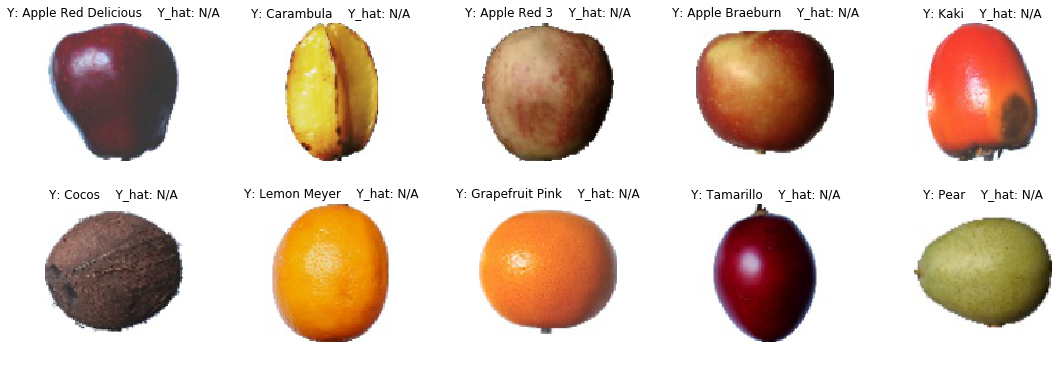

In [10]:
plot_some(X_train, y_train, labels_list=labels_list)

Each image is of shape 100, 100, 3 (3 for RGB) and we have 60 classes. We will be allowing our neural network to see a batch of only 32 images at a time and we will allow the Neural Network to train for only one cycle (Each cycle known as an epoch). Let us define these constants in code:

In [11]:
INPUT_SHAPE = [100, 100, 3]
N_CLASSES = 60
BATCH_SIZE = 32
EPOCHS = 1

Let us define our Neural Network with these params and see its summary. Don't worry if you do not understand summary as of now. I'll be explaining them in the next post. Just go along for now. :)

In [13]:
model = defin_model(INPUT_SHAPE, N_CLASSES)

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        36928     
__________

### Training a Neural Network
Remember when I told you that an artificial neuron does a weighted sum of the input. It must be confusing that how do we get those magical number ($w_{1}$, $w_{2}$, ..., $w_{n}$) to do the weighted sum. Let me explain how this works but from a satellite view for now as it is more complex of a thing to just throw in this post. 

Consider a neural network having all weights randomly assigned. What will happen? Well it will take an input and will throw out some garbbage that is not of use to anyone. But we have data that knows what the true value is. What if we just find the error between the garbbage and the true value and nudge our weights in the direction where the error is minimum and do it continuously till the time the error is acceptable enough.

This is what we are going to do with the next statement. We will nudge the randomly assigned weights to make the result better and better. And we will do it for every next 32 images and not all the 22988 images. This ensures that we play in the bound of the memory available and don't let the NN to overly fit the training data and over look generalization.

In [15]:
model.fit(X_train,
          y_train_hot,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(X_dev, y_dev_hot))

Train on 22988 samples, validate on 9673 samples
Epoch 1/1
22988/22988 [==============================] - 705s 31ms/step - loss: 0.9468 - acc: 0.7427 - val_loss: 0.5162 - val_acc: 0.8657


In [19]:
results = model.evaluate(X_train, y_train_hot)
print('Loss on Training set: {}  and Accuracy on Training Set: {}'.format(results[0], results[1]))

22988/22988 [==============================] - 177s 8ms/step
Loss on Training set: 0.059198942950391784  and Accuracy on Training Set: 0.9790760396625013


In [20]:
results = model.evaluate(X_dev, y_dev_hot)
print('Loss on Validation set: {}  and Accuracy on Validation Set: {}'.format(results[0], results[1]))

9673/9673 [==============================] - 74s 8ms/step
Loss on Validation set: 0.5162139866278878  and Accuracy on Validation Set: 0.8657086736337852


Here we saw that we are getting an accuracy of 98% on training and 86.5% in validation data. Common let's find out results on testing data. Remember that the testing data was originally taken from training data and thus it might not be a good representation of general data.

In [21]:
results = model.evaluate(X_test, y_test_hot)
print('Loss on Test set: {}  and Accuracy on Test Set: {}'.format(results[0], results[1]))

5748/5748 [==============================] - 44s 8ms/step
Loss on Test set: 0.05869973290169828  and Accuracy on Test Set: 0.982080723729993


[4870 3857 2178 4037 4227 1719 4608 5546 1334 2730]


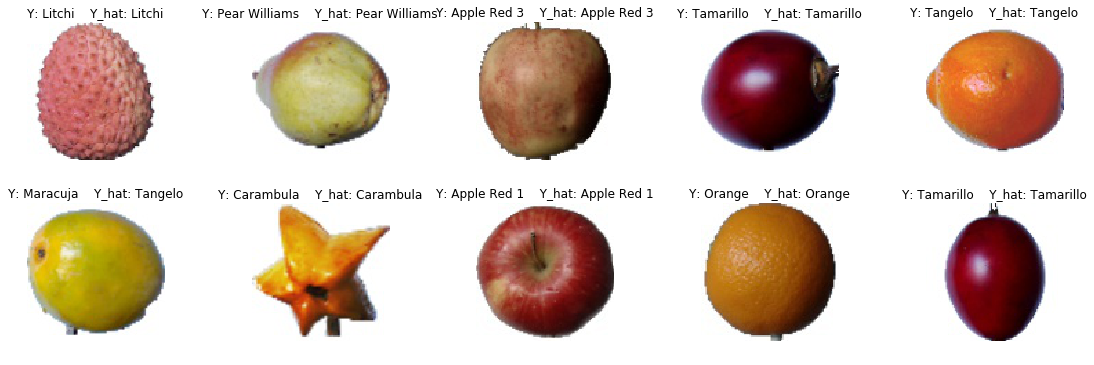

In [24]:
plot_some(X_test, y_test, np.argmax(model.predict(X_test), axis=1), labels_list=labels_list)

This brings us to the end of this post. I hope you got a sense of what Deep Learning can do. This is just a demo and it can be improved 1000s of folds by using other techniques. But I think it is good enough for any beginner.